This file is analysing combined opportunity ADL data and filling missing values in Opportunity dataset and for Normalizing opportunity dataset

Statistics of each column

In [8]:
import numpy as np
import pandas as pd
import os

all_sub_data_np = np.load("opportunity_data/raw/ADL_combined/sub_1_2_3_4.npy")
print(all_sub_data_np.shape)

all_sub_data_p = pd.DataFrame(all_sub_data_np)

# Create index columns for the columns starting from 0
all_sub_data_p.columns = [i+1 for i in range(len(all_sub_data_p.columns))]

num_rows, num_columns = all_sub_data_p.shape

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

graph = False
if graph:
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Iterate through each column and create a plot
    for column in all_sub_data_p.columns[1:115]:
        plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
        
        # Plot the histogram
        sns.histplot(all_sub_data_p[column], kde=True)  # Use sns.histplot for histograms, you can use other plot types as needed
        
        # Calculate statistics
        mean = all_sub_data_p[column].mean()
        std = all_sub_data_p[column].std()
        median = all_sub_data_p[column].median()
        plt.axvline(median, color='k', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
        # Plot lines for mean and standard deviations
        plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        
        plt.axvline(mean + std, color='g', linestyle='dashed', linewidth=2, label=f'1 Std: {mean + std:.2f}')
        plt.axvline(mean + 2*std, color='b', linestyle='dashed', linewidth=2, label=f'2 Std: {mean + 2*std:.2f}')
        plt.axvline(mean + 3*std, color='m', linestyle='dashed', linewidth=2, label=f'3 Std: {mean + 3*std:.2f}')
        plt.axvline(mean + 4*std, color='y', linestyle='dashed', linewidth=2, label=f'4 Std: {mean + 4*std:.2f}')
        plt.axvline(mean - std, color='g', linestyle='dashed', linewidth=2, label=f'1 Std: {mean - std:.2f}')
        plt.axvline(mean - 2*std, color='b', linestyle='dashed', linewidth=2, label=f'2 Std: {mean - 2*std:.2f}')
        plt.axvline(mean - 3*std, color='m', linestyle='dashed', linewidth=2, label=f'3 Std: {mean - 3*std:.2f}')
        plt.axvline(mean - 4*std, color='y', linestyle='dashed', linewidth=2, label=f'4 Std: {mean - 4*std:.2f}')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        # Add a legend to show the lines
        plt.legend()
        
        plt.show()

# Step 1: Count NaN values in each column
nan_counts = all_sub_data_p.isna().sum()

# Step 2: Calculate the percentage of NaN values in each column
percentage_nan = (nan_counts / len(all_sub_data_p)) * 100

# Step 3: Create a dictionary with column names as keys and percentages as values for columns with more than 30% NaN
nan_percentage_dict = {col: percent for col, percent in percentage_nan.items() if percent > 5}

# Print the filtered dictionary
print(f"columns and its percentage of NaN before interpolation: {nan_percentage_dict}")

all_sub_data_p.interpolate(limit = 20, limit_direction= 'both')

# Step 1: Count NaN values in each column
nan_counts = all_sub_data_p.isna().sum()

# Step 2: Calculate the percentage of NaN values in each column
percentage_nan = (nan_counts / len(all_sub_data_p)) * 100

# Step 3: Create a dictionary with column names as keys and percentages as values for columns with more than 30% NaN
nan_percentage_dict = {col: percent for col, percent in percentage_nan.items() if percent > 5}

# Print the filtered dictionary
print(f"columns and its percentage of NaN after interpolation: {nan_percentage_dict}")

(643168, 116)
Number of Rows: 643168
Number of Columns: 116
columns and its percentage of NaN before interpolation: {2: 6.7420953778794965, 3: 6.7420953778794965, 4: 6.7420953778794965, 8: 5.030411960794069, 9: 5.030411960794069, 10: 5.030411960794069, 14: 21.374508682023983, 15: 21.374508682023983, 16: 21.374508682023983, 20: 9.04646997363053, 21: 9.04646997363053, 22: 9.04646997363053, 29: 5.436060251753819, 30: 5.436060251753819, 31: 5.436060251753819, 35: 44.11475695308224, 36: 44.11475695308224, 37: 44.11475695308224}
columns and its percentage of NaN after interpolation: {2: 6.7420953778794965, 3: 6.7420953778794965, 4: 6.7420953778794965, 8: 5.030411960794069, 9: 5.030411960794069, 10: 5.030411960794069, 14: 21.374508682023983, 15: 21.374508682023983, 16: 21.374508682023983, 20: 9.04646997363053, 21: 9.04646997363053, 22: 9.04646997363053, 29: 5.436060251753819, 30: 5.436060251753819, 31: 5.436060251753819, 35: 44.11475695308224, 36: 44.11475695308224, 37: 44.11475695308224}


In [9]:
print(all_sub_data_p.head())

     1      2      3      4     5       6      7      8       9      10   ...  \
0    0.0  148.0  956.0 -358.0  19.0   986.0  196.0   95.0   975.0  152.0  ...   
1   33.0   89.0  973.0 -287.0  10.0  1004.0  162.0  125.0   968.0  122.0  ...   
2   67.0  130.0  988.0 -418.0 -11.0  1014.0  202.0  127.0  1002.0  113.0  ...   
3  100.0   89.0  980.0 -425.0 -47.0  1025.0  191.0  110.0  1006.0  105.0  ...   
4  133.0   64.0  857.0 -391.0  -8.0  1022.0  204.0   97.0  1002.0   93.0  ...   

     107   108   109   110   111   112   113    114  115  116  
0 -845.0 -20.0  57.0  42.0  57.0  20.0  42.0  175.0  0.0  0.0  
1 -847.0 -17.0  38.0  31.0  38.0  17.0  31.0  175.0  0.0  0.0  
2 -852.0  27.0  31.0  15.0  31.0 -27.0  15.0  175.0  0.0  0.0  
3 -852.0  26.0  22.0  -2.0  22.0 -26.0  -2.0  175.0  0.0  0.0  
4 -850.0  22.0  45.0  -7.0  45.0 -22.0  -7.0  175.0  0.0  0.0  

[5 rows x 116 columns]


          2      3      4     5       6      7      8       9      10     11   \
0       148.0  956.0 -358.0  19.0   986.0  196.0   95.0   975.0  152.0  194.0   
1        89.0  973.0 -287.0  10.0  1004.0  162.0  125.0   968.0  122.0  224.0   
2       130.0  988.0 -418.0 -11.0  1014.0  202.0  127.0  1002.0  113.0  279.0   
3        89.0  980.0 -425.0 -47.0  1025.0  191.0  110.0  1006.0  105.0  353.0   
4        64.0  857.0 -391.0  -8.0  1022.0  204.0   97.0  1002.0   93.0  548.0   
...       ...    ...    ...   ...     ...    ...    ...     ...    ...    ...   
643163    NaN    NaN    NaN   NaN     NaN    NaN    NaN     NaN    NaN    NaN   
643164    NaN    NaN    NaN   NaN     NaN    NaN    NaN     NaN    NaN    NaN   
643165    NaN    NaN    NaN   NaN     NaN    NaN    NaN     NaN    NaN    NaN   
643166    NaN    NaN    NaN   NaN     NaN    NaN    NaN     NaN    NaN    NaN   
643167    NaN    NaN    NaN   NaN     NaN    NaN    NaN     NaN    NaN    NaN   

        ...    105    106  

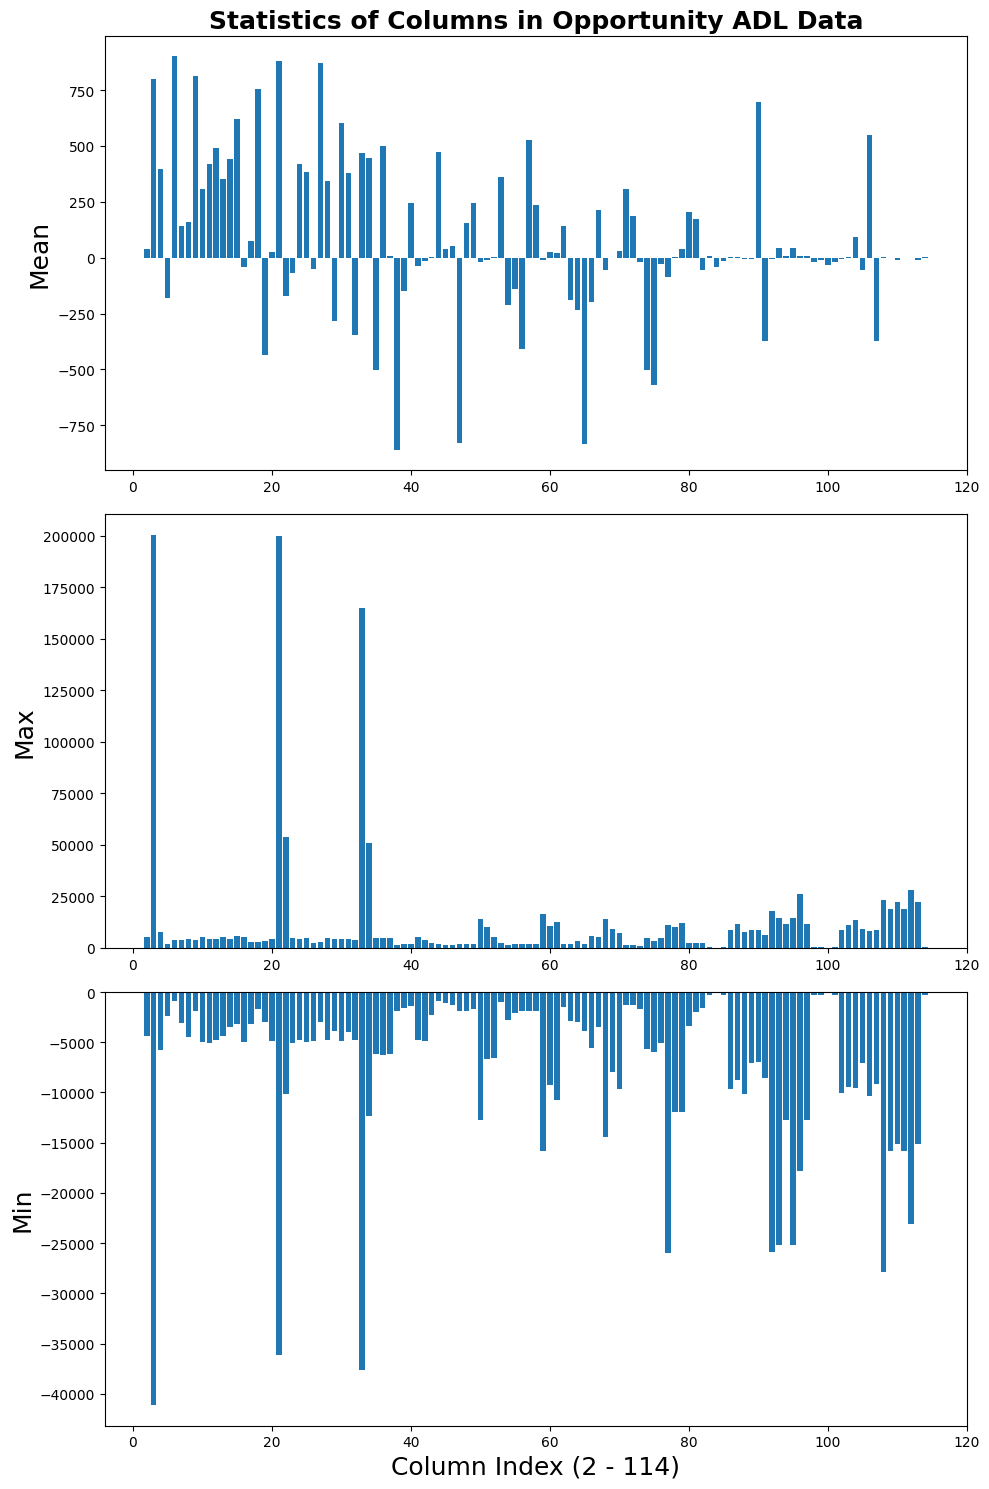

In [10]:
import matplotlib.pyplot as plt

# Select the columns you want to compare (e.g., columns 2 to 114)
selected_columns = all_sub_data_p.iloc[:, 1:114]
print(selected_columns)
# Calculate the mean, max, and min values for each column
mean_values = selected_columns.mean()
max_values = selected_columns.max()
min_values = selected_columns.min()

# Create subplots for the three sets of statistics
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the means
axes[0].bar(mean_values.index, mean_values)
axes[0].set_title("Statistics of Columns in Opportunity ADL Data", fontsize=18, fontweight='bold')
axes[0].set_ylabel("Mean", fontsize=18)

# Plot the max values
axes[1].bar(max_values.index, max_values)
axes[1].set_ylabel("Max", fontsize=18)

# Plot the min values
axes[2].bar(min_values.index, min_values)
axes[2].set_xlabel("Column Index (2 - 114)", fontsize=18)
axes[2].set_ylabel("Min", fontsize=18)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

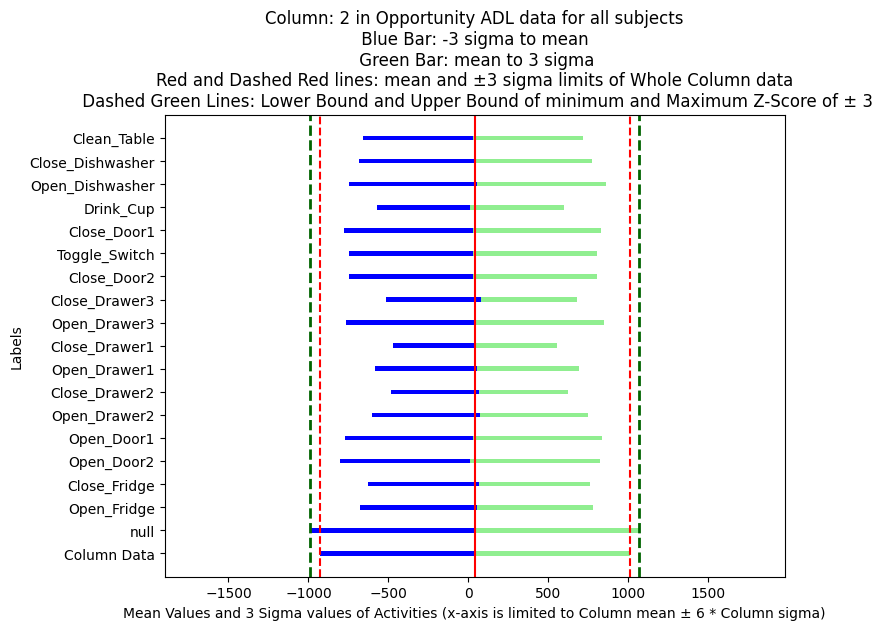

Overall Min Z-Scores: [-987.554903221285]
Overall Max Z-Scores: [1068.4473097652933]


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gestures_dict_old = {   0 : 'null',
                        506616 : 'Open_Door1',
                        506617 : 'Open_Door2',
                        504616 : 'Close_Door1',
                        504617 : 'Close_Door2',
                        506620 : 'Open_Fridge',
                        504620 : 'Close_Fridge',
                        506605 : 'Open_Dishwasher',
                        504605 : 'Close_Dishwasher',
                        506619 : 'Open_Drawer1',
                        504619 : 'Close_Drawer1',
                        506611 : 'Open_Drawer2',
                        504611 : 'Close_Drawer2',
                        506608 : 'Open_Drawer3',
                        504608 : 'Close_Drawer3',
                        508612 : 'Clean_Table',
                        507621 : 'Drink_Cup',
                        505606 : 'Toggle_Switch',
}
# Create a list of unique labels in the DataFrame
unique_labels = all_sub_data_p[116].unique()

# Lists to store min and max z-scores for all activities
min_z_scores = []
max_z_scores = []

for col in range(2, 3):
    # Calculate the mean and sigma for the entire dataset
    mean = all_sub_data_p[col].mean()
    sigma = all_sub_data_p[col].std()

    # Create a plot
    plt.figure(figsize=(8, 6))

    # Set the width of the rectangles
    rect_width = 3 * sigma

    # Define colors for the regions
    color_below_mean = 'blue'  # Color for -3σ to mean
    color_above_mean = 'lightgreen'  # Color for mean to 3σ
    color_min_max = 'darkgreen'  # Color for minimum and maximum z-scores

    # Rectangle for the entire dataset
    plt.barh(0, 3 * sigma, left=mean - 3 * sigma, color=color_below_mean, label='Column Data (Below Mean)', height=0.2)
    plt.barh(0, 3 * sigma, left=mean, color=color_above_mean, label='Column Data (Above Mean)', height=0.2)

    # Add vertical lines
    plt.axvline(mean, color='r', linestyle='-', label='Mean (All Data)')
    plt.axvline(mean - 3 * sigma, color='r', linestyle='--', label='Mean - 3σ (All Data)')
    plt.axvline(mean + 3 * sigma, color='r', linestyle='--', label='Mean + 3σ (All Data)')

    # Lists to store min and max z-scores for each activity
    activity_min_z_scores = []
    activity_max_z_scores = []

    # Plot rectangles for each label
    for i, label in enumerate(unique_labels):
        label_data = all_sub_data_p[all_sub_data_p[116] == label]
        label_mean = label_data[col].mean()
        label_sigma = label_data[col].std()

        # Rectangle for the region below the mean
        plt.barh(i + 1, 3 * label_sigma, left=label_mean - 3 * label_sigma, color=color_below_mean,
                 label=f'{label} Data (Below Mean)', height=0.2)

        # Rectangle for the region above the mean
        plt.barh(i + 1, 3 * label_sigma, left=label_mean, color=color_above_mean, label=f'{label} Data (Above Mean)',
                 height=0.2)

        # Update min and max z-scores for the activity
        min_z_score = label_mean - 3 * label_sigma
        max_z_score = label_mean + 3 * label_sigma
        activity_min_z_scores.append(min_z_score)
        activity_max_z_scores.append(max_z_score)

    # Calculate overall min and max z-scores for the column
    min_z_scores.append(min(activity_min_z_scores))
    max_z_scores.append(max(activity_max_z_scores))

    # Draw dark green lines for the overall min and max z-scores
    plt.axvline(min(activity_min_z_scores), color=color_min_max, linestyle='--', label='Overall Min Z-Score', linewidth=2)
    plt.axvline(max(activity_max_z_scores), color=color_min_max, linestyle='--', label='Overall Max Z-Score', linewidth=2)

    label_name_list = [gestures_dict_old[label_num] for label_num in unique_labels]

    # Set y-axis labels and limit
    plt.yticks(np.arange(len(unique_labels) + 1), ['Column Data'] + label_name_list)
    limit = 6
    plt.xlim(mean - limit * sigma, mean + limit* sigma)

    # Set labels
    plt.xlabel(f'Mean Values and 3 Sigma values of Activities (x-axis is limited to Column mean \u00B1 {limit} * Column sigma)')
    plt.ylabel('Labels')
    plt.title(f'Column: {col} in Opportunity ADL data for all subjects\n Blue Bar: -3 sigma to mean \n Green Bar: mean to 3 sigma\nRed and Dashed Red lines: mean and \u00B13 sigma limits of Whole Column data\n Dashed Green Lines: Lower Bound and Upper Bound of minimum and Maximum Z-Score of \u00B1 3')
    # Show the plot
    plt.show()

# Now you can use the min_z_scores and max_z_scores lists as needed
print("Overall Min Z-Scores:", min_z_scores)
print("Overall Max Z-Scores:", max_z_scores)


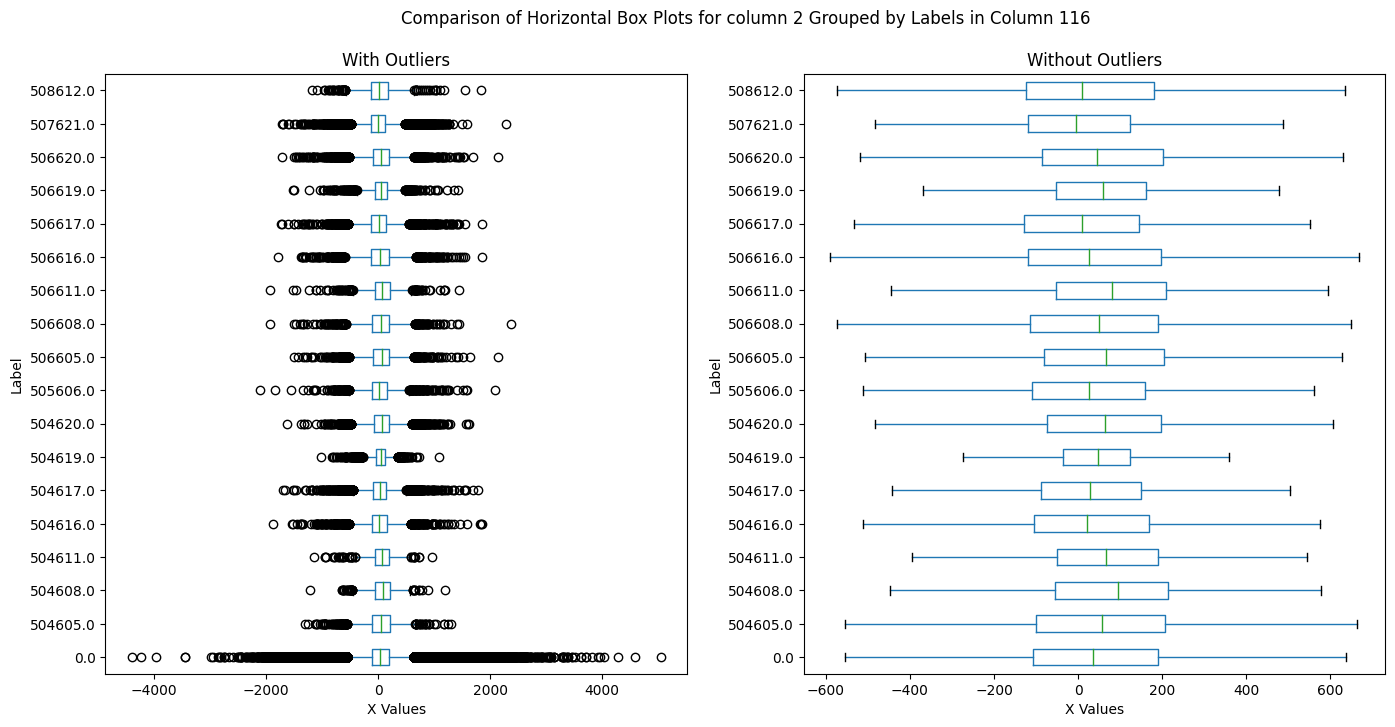

box_plot_lower_bound_list: [-591.5]
box_plot_upper_bound_list: [668.5]


In [12]:
import pandas as pd
import matplotlib.pyplot as plt


box_plot_lower_bound_list = []
box_plot_upper_bound_list = []

for i in range(2,3): 
    # 115
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Create horizontal box plots for columns 2 to 114, grouped by the labels in column 116, with and without outliers
    all_sub_data_p.boxplot(column=[i], by=[116], grid=False, vert=False, showfliers=True, ax=axes[0])
    all_sub_data_p.boxplot(column=[i], by=[116], grid=False, vert=False, showfliers=False, ax=axes[1])

    box_plot_lower_bound_list_column = []
    box_plot_upper_bound_list_column = []

    for label, divided_dataset in all_sub_data_p.groupby(116)[i]:
        # Calculate quartiles and IQR
        Q1 = divided_dataset.quantile(0.25)
        Q3 = divided_dataset.quantile(0.75)
        IQR = Q3 - Q1

        # Determine maximum and minimum values for outliers
        maximum_value = Q3 + 1.5 * IQR
        minimum_value = Q1 - 1.5 * IQR

        box_plot_lower_bound_list_column.append(minimum_value)
        box_plot_upper_bound_list_column.append(maximum_value)

    box_plot_lower_bound_list.append(min(box_plot_lower_bound_list_column))
    box_plot_upper_bound_list.append(max(box_plot_upper_bound_list_column))

    # Set titles for the subplots
    axes[0].set_title('With Outliers')
    axes[1].set_title('Without Outliers')

    # Set plot labels and common title
    for ax in axes:
        ax.set_xlabel('X Values')
        ax.set_ylabel('Label')

    plt.suptitle(f'Comparison of Horizontal Box Plots for column {i} Grouped by Labels in Column 116')

    # Show the plot
    plt.show()


print(f'box_plot_lower_bound_list: {box_plot_lower_bound_list}')
print(f'box_plot_upper_bound_list: {box_plot_upper_bound_list}')

#Dividing the datasets based on labels to fill the mean values of particular class and column in NaN values

In [13]:
# Initialize counters
min_lower_count = 0
max_higher_count = 0

# Initialize masks
min_mask = []
max_mask = []

# Initialize the dictionary
result_dict = {}

# Compare values index-wise
for i in range(len(min_z_scores)):
    if min_z_scores[i] <= box_plot_lower_bound_list[i]:
        min_lower_count += 1
        min_mask.append('Z')
    else:
        min_mask.append('B')

    if max_z_scores[i] >= box_plot_upper_bound_list[i]:
        max_higher_count += 1
        max_mask.append('Z')
    else:
        max_mask.append('B')

    # Add values to the dictionary with rounded decimal values
    result_dict[i + 1] = [
        round(min_z_scores[i], 2),
        round(box_plot_lower_bound_list[i], 2),
        min_mask[i],
        round(max_z_scores[i], 2),
        round(box_plot_upper_bound_list[i], 2),
        max_mask[i]
    ]

# Print the results
print(f'Number of times overall min Z-Score is lower than Box plot minimums: {min_lower_count} of {len(min_z_scores)} in percentage {round(min_lower_count / len(min_z_scores) * 100, 2)}')
print(f'Number of times overall max Z-Score is higher than Box plot maximums: {max_higher_count} of {len(min_z_scores)} in percentage {round(max_higher_count / len(min_z_scores) * 100, 2)}')

# Print the dictionary
print("Result Dictionary:")
for key, value in result_dict.items():
    print(f'{key}: {value}')



Number of times overall min Z-Score is lower than Box plot minimums: 1 of 1 in percentage 100.0
Number of times overall max Z-Score is higher than Box plot maximums: 1 of 1 in percentage 100.0
Result Dictionary:
1: [-987.55, -591.5, 'Z', 1068.45, 668.5, 'Z']


In [14]:
#Dividing the datasets based on labels to fill the mean values of particular class and column in NaN values
import pandas as pd
import matplotlib.pyplot as plt

locomotion_dict_old = { 0 : 'null',
                        101 : 'Stand', 
                        102 : 'Walk',
                        104 : 'Sit',
                        105 : 'Lie',
                        }

gestures_dict_old = {   0 : 'null',
                        506616 : 'Open_Door1',
                        506617 : 'Open_Door2',
                        504616 : 'Close_Door1',
                        504617 : 'Close_Door2',
                        506620 : 'Open_Fridge',
                        504620 : 'Close_Fridge',
                        506605 : 'Open_Dishwasher',
                        504605 : 'Close_Dishwasher',
                        506619 : 'Open_Drawer1',
                        504619 : 'Close_Drawer1',
                        506611 : 'Open_Drawer2',
                        504611 : 'Close_Drawer2',
                        506608 : 'Open_Drawer3',
                        504608 : 'Close_Drawer3',
                        508612 : 'Clean_Table',
                        507621 : 'Drink_Cup',
                        505606 : 'Toggle_Switch',
}



# Create an empty dictionary to store the divided datasets
divided_datasets = {}

# Iterate through the labels in gestures_dict_old and filter rows based on the label
for label_id, label_name in gestures_dict_old.items():
    # Filter rows where the last column matches the current label
    subset_df = all_sub_data_p[all_sub_data_p.iloc[:, -1] == label_id].copy()
    
    # Add the filtered DataFrame to the dictionary
    divided_datasets[label_name] = subset_df

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a function to calculate statistics after filling Na values with median of column
def statistics_for_preprocessing(column_name, df):
    data = df[column_name]
    box_stats_before = pd.Series(data).describe()
    org_length = len(data)

    # Using median imputation (replace missing values with the median)
    data.fillna(data.median(), inplace=True)
    box_stats_after = pd.Series(data).describe()

    # Create a table with the statistics and percentage of outliers
    table_data = {
        'mean_before' : box_stats_before['mean'],
        'mean_after' : box_stats_after['mean'],
        'median_before' : box_stats_before['50%'],
         'median_after' : box_stats_after['50%'],
        'std_before' : box_stats_before['std'],
        'std_after' : box_stats_after['std'],
        'min' : box_stats_before['min'],
        'max' : box_stats_before['max'],
        'length' : org_length,
    }
    return table_data

data_for_prepprocessing_per_label = {}
for label_name, label_dataset in divided_datasets.items():
    print(f"label_name: {label_name}")
    df = label_dataset

    # Loop through each column and create a box plot with statistics and percentage of outliers
    data_for_prepprocessing_per_column = {}
    for column in df.columns[1:114]:
       data_for_prepprocessing_per_column[column] = statistics_for_preprocessing(column,df)

    data_for_prepprocessing_per_label[label_name] = data_for_prepprocessing_per_column

label_name: null
label_name: Open_Door1
label_name: Open_Door2
label_name: Close_Door1
label_name: Close_Door2
label_name: Open_Fridge
label_name: Close_Fridge
label_name: Open_Dishwasher
label_name: Close_Dishwasher
label_name: Open_Drawer1
label_name: Close_Drawer1
label_name: Open_Drawer2
label_name: Close_Drawer2
label_name: Open_Drawer3
label_name: Close_Drawer3
label_name: Clean_Table
label_name: Drink_Cup
label_name: Toggle_Switch


In [16]:
print(data_for_prepprocessing_per_label)

import json
# Specify the file path where you want to save the dictionary in JSON format
file_path = "statistics.json"

# Write the dictionary to the JSON file
with open(file_path, "w") as file:
    json.dump(data_for_prepprocessing_per_label, file, indent=4)

{'null': {2: {'mean_before': 40.44620327200415, 'mean_after': 40.061461645681185, 'median_before': 35.0, 'median_after': 35.0, 'std_before': 342.66703549776304, 'std_after': 330.34460768190877, 'min': -4393.0, 'max': 5046.0, 'length': 515118}, 3: {'mean_before': 779.973356478, 'mean_after': 791.3489239358748, 'median_before': 941.0, 'median_after': 941.0, 'std_before': 656.1642422871794, 'std_after': 633.9068848034757, 'min': -41129.0, 'max': 200346.0, 'length': 515118}, 4: {'mean_before': 398.83707658628697, 'mean_after': 395.2457417523752, 'median_before': 348.0, 'median_after': 348.0, 'std_before': 493.6821311328674, 'std_after': 476.10312604161754, 'min': -5789.0, 'max': 7564.0, 'length': 515118}, 5: {'mean_before': -155.6549962286558, 'mean_after': -154.43993220970728, 'median_before': -118.0, 'median_after': -118.0, 'std_before': 260.8218007756059, 'std_after': 256.6654121358254, 'min': -2426.0, 'max': 1784.0, 'length': 515118}, 6: {'mean_before': 903.7074038708435, 'mean_after':

In [17]:
# Specify the file path where the dictionary is stored
file_path = "statistics.json"

import json

# Open the JSON file for reading
with open(file_path, 'r') as json_file:
    statistics_dict = json.load(json_file)

columns = [col for col in range(2, 115)]
   
column_lower_bound_dict = {}
column_upper_bound_dict = {}

for col in columns:
    column_lower_bound = []
    column_upper_bound = []

    for label in gestures_dict_old.values():
        column_lower_bound.append(statistics_dict[label][str(col)]["mean_after"] - 3*statistics_dict[label][str(col)]["std_after"])
        column_upper_bound.append(statistics_dict[label][str(col)]["mean_after"] + 3*statistics_dict[label][str(col)]["std_after"])
        
    column_lower_bound_dict[str(col)] = min(column_lower_bound)
    column_upper_bound_dict[str(col)] = max(column_upper_bound)
    
print(column_lower_bound_dict)
print(column_upper_bound_dict)

column_lower_bound_val = np.array(list(column_lower_bound_dict.values()))
column_upper_bound_val = np.array(list(column_upper_bound_dict.values()))

{'2': -950.9723614000451, '3': -1110.3717304745521, '4': -1033.0636363724775, '5': -1483.8679184262667, '6': -168.7759841417519, '7': -1267.1134900535865, '8': -816.5434254725942, '9': -31.56162675439839, '10': -1002.8726487699921, '11': -1004.1098757579698, '12': -1386.0963203220279, '13': -1093.1970909409624, '14': -741.5649197416474, '15': -1035.503939415968, '16': -1695.015518071117, '17': -948.5445169260892, '18': -1177.29012300577, '19': -1752.41059024094, '20': -1003.9712960842343, '21': -1881.3009562157567, '22': -1245.8035527768916, '23': -2066.670099025652, '24': -1539.854462782191, '25': -1501.4220258854511, '26': -1345.3859582869566, '27': -365.1088787045418, '28': -1009.8668084221341, '29': -1579.8917318819094, '30': -952.843187611367, '31': -589.5918825876081, '32': -1584.5311069691238, '33': -1496.3091317763356, '34': -824.1195489440166, '35': -1968.1906767868504, '36': -1276.546128346335, '37': -2128.9758030168064, '38': -1657.4699720755516, '39': -1346.16999998548, '40

In [18]:
all_sub_median_filled_data = all_sub_data_p.copy(deep=True)

#replace the locomotion and gestures codes with strings
all_sub_median_filled_data[115] = all_sub_median_filled_data[115].replace(locomotion_dict_old)
all_sub_median_filled_data[116] = all_sub_median_filled_data[116].replace(gestures_dict_old)

# Iterate through DataFrame rows
for index, row in all_sub_median_filled_data.iterrows():
    class_label = row[116]
    # Iterate through columns 2 to 115
    for col in range(2, 115):
        if pd.isna(row[col]):
            median_value = statistics_dict[class_label][str(col)]["median_before"]
            all_sub_median_filled_data.at[index, col] = median_value

all_sub_clipped_data = all_sub_median_filled_data.copy(deep=True)
for column in all_sub_clipped_data.columns[1:114]:
    # Clip values in the column
    all_sub_clipped_data[column] = np.clip(all_sub_clipped_data[column], column_lower_bound_dict.get(str(column)),column_upper_bound_dict.get(str(column)))

all_sub_clipped_data_stats = all_sub_clipped_data.describe()
all_sub_clipped_data_min_values = all_sub_clipped_data_stats.loc['min']
all_sub_clipped_data_max_values = all_sub_clipped_data_stats.loc['max']
print(all_sub_clipped_data_min_values)
print(all_sub_clipped_data_max_values)

all_sub_scaled_data = all_sub_clipped_data.copy(deep=True)
# Loop through each column in the DataFrame
for column in all_sub_scaled_data.columns[1:114]:
    min_val = all_sub_scaled_data[column].min()
    max_val = all_sub_scaled_data[column].max()
    
    # Perform min-max scaling between -1 and 1
    all_sub_scaled_data[column] = -1 + 2 * (all_sub_scaled_data[column] - min_val) / (max_val - min_val)
print(all_sub_scaled_data.head())

1         0.000000
2      -950.972361
3     -1110.371730
4     -1033.063636
5     -1483.867918
          ...     
110   -4682.278113
111   -3341.321034
112   -5202.106708
113   -4682.278113
114    -290.000000
Name: min, Length: 114, dtype: float64
1      1.702883e+06
2      1.031095e+03
3      2.693070e+03
4      1.823555e+03
5      6.155563e+02
           ...     
110    4.451429e+03
111    3.649287e+03
112    5.204903e+03
113    4.451429e+03
114    3.050000e+02
Name: max, Length: 114, dtype: float64
     1         2         3         4         5         6         7    \
0    0.0  0.108915  0.086580 -0.527369  0.431695  0.284843  0.087244   
1   33.0  0.049381  0.095519 -0.477660  0.423122  0.304870  0.061979   
2   67.0  0.090752  0.103407 -0.569376  0.403116  0.315996  0.091703   
3  100.0  0.049381  0.099200 -0.574277  0.368821  0.328235  0.083529   
4  133.0  0.024155  0.034522 -0.550473  0.405974  0.324898  0.093189   

        8         9         10   ...       107       108    

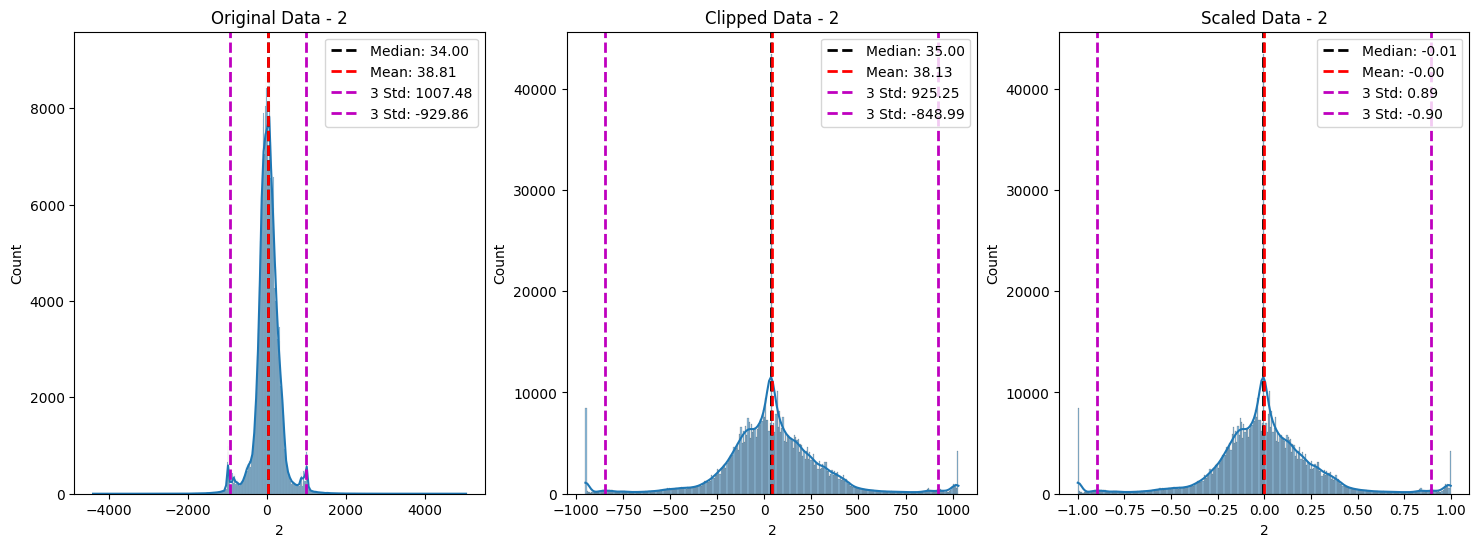

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each column
for column in all_sub_data_p.columns[1:2]:
    # 116
    # Create subplots for original, clipped, and scaled data
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot original data
    sns.histplot(all_sub_data_p[column], kde=True, ax=axes[0])
    mean = all_sub_data_p[column].mean()
    std = all_sub_data_p[column].std()
    median = all_sub_data_p[column].median()
    axes[0].axvline(median, color='k', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    axes[0].axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    axes[0].axvline(mean + 3*std, color='m', linestyle='dashed', linewidth=2, label=f'3 Std: {mean + 3*std:.2f}')
    axes[0].axvline(mean - 3*std, color='m', linestyle='dashed', linewidth=2,  label=f'3 Std: {mean - 3*std:.2f}')
    axes[0].set_title(f'Original Data - {column}')
    axes[0].legend()
    
    # Plot clipped data
    sns.histplot(all_sub_clipped_data[column], kde=True, ax=axes[1])
    mean_clipped = all_sub_clipped_data[column].mean()
    std_clipped = all_sub_clipped_data[column].std()
    median_clipped  = all_sub_clipped_data[column].median()
    axes[1].axvline(median_clipped, color='k', linestyle='dashed', linewidth=2, label=f'Median: {median_clipped:.2f}')
    axes[1].axvline(mean_clipped, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_clipped:.2f}')
    axes[1].axvline(mean_clipped + 3*std_clipped, color='m', linestyle='dashed', linewidth=2, label=f'3 Std: {mean_clipped  + 3*std_clipped:.2f}')
    axes[1].axvline(mean_clipped - 3*std_clipped, color='m', linestyle='dashed', linewidth=2,  label=f'3 Std: {mean_clipped  - 3*std_clipped:.2f}')
    axes[1].set_title(f'Clipped Data - {column}')
    axes[1].legend()
    
    # Plot scaled data
    sns.histplot(all_sub_scaled_data[column], kde=True, ax=axes[2])
    mean_scaled = all_sub_scaled_data[column].mean()
    std_scaled = all_sub_scaled_data[column].std()
    median_scaled = all_sub_scaled_data[column].median()
    axes[2].axvline(median_scaled, color='k', linestyle='dashed', linewidth=2, label=f'Median: {median_scaled:.2f}')
    axes[2].axvline(mean_scaled, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_scaled:.2f}')
    axes[2].axvline(mean_scaled + 3*std_scaled, color='m', linestyle='dashed', linewidth=2, label=f'3 Std: {mean_scaled + 3*std_scaled:.2f}')
    axes[2].axvline(mean_scaled - 3*std_scaled, color='m', linestyle='dashed', linewidth=2,  label=f'3 Std: {mean_scaled - 3*std_scaled:.2f}')
    axes[2].set_title(f'Scaled Data - {column}')
    axes[2].legend()
    
    plt.show()


In [20]:
import os
file_save_path = f"./raw_clipped_scaled/"
os.makedirs(file_save_path, exist_ok=True)

for i in range(1,5):
    path = f"./opportunity_data/raw/ADL_combined/sub_{i}.npy"

    sub_data_np = np.load(path)
    print(sub_data_np.shape)

    df = pd.DataFrame(sub_data_np)

    # Create index columns for the columns starting from 0
    df.columns = [i+1 for i in range(len(df.columns))]

    sub_median_filled_data = df.copy(deep=True)
    sub_median_filled_data[1] = i
    #replace the locomotion and gestures codes with strings
    sub_median_filled_data[115] = sub_median_filled_data[115].replace(locomotion_dict_old)
    sub_median_filled_data[116] = sub_median_filled_data[116].replace(gestures_dict_old)
    sub_median_filled_data.interpolate(limit = 20, limit_direction= 'both')
    # Iterate through DataFrame rows
    for index, row in sub_median_filled_data.iterrows():
        class_label = row[116]
        # Iterate through columns 2 to 115
        for col in range(2, 115):
            if pd.isna(row[col]):
                median_value = statistics_dict[class_label][str(col)]["median_before"]
                sub_median_filled_data.at[index, col] = median_value
    
    clipped_data = sub_median_filled_data.copy(deep=True)
    for column in clipped_data.columns[1:114]:
        # Clip values in the column
        clipped_data[column] = np.clip(clipped_data[column], column_lower_bound_dict.get(str(column)),column_upper_bound_dict.get(str(column)))

    scaled_data = clipped_data.copy(deep=True)
    # Loop through each column in the DataFrame
    for column in scaled_data.columns[1:114]:
        # Perform min-max scaling between -1 and 1
        scaled_data[column] = -1 + 2 * (scaled_data[column] - all_sub_clipped_data_min_values[column]) / (all_sub_clipped_data_max_values[column] - all_sub_clipped_data_min_values[column])
    
    # Rename the old_column_name to "label"
    scaled_data.columns = ['label' if col == 116 else col for col in scaled_data.columns]
    print(scaled_data.describe())
    # Specify the file path where you want to save the CSV
    file_path = f"{file_save_path}sbj_{i}.csv"

    columns_to_save = list(range(1,115))
    columns_to_save.append('label')
    # Save the Pandas DataFrame as a CSV file
    scaled_data[columns_to_save].to_csv(file_path, index=False)

(179668, 116)
            1              2              3              4              5    \
count  179668.0  179668.000000  179668.000000  179668.000000  179668.000000   
mean        1.0      -0.136318      -0.000603       0.011221       0.181043   
std         0.0       0.297889       0.201295       0.330352       0.187067   
min         1.0      -1.000000      -1.000000      -1.000000      -1.000000   
25%         1.0      -0.220034      -0.157935      -0.138797       0.069691   
50%         1.0      -0.125184       0.072382      -0.010674       0.207824   
75%         1.0      -0.005107       0.109717       0.271478       0.304041   
max         1.0       1.000000       1.000000       1.000000       1.000000   

                 6              7              8              9    \
count  179668.000000  179668.000000  179668.000000  179668.000000   
mean        0.214128       0.029417      -0.184702       0.102208   
std         0.255641       0.180128       0.297096       0.288080  

In [22]:
import os
import numpy as np
import pandas as pd
file_save_path = f"./raw_filled_zero/"
os.makedirs(file_save_path, exist_ok=True)

for i in range(1,5):
    path = f"./opportunity_data/raw/ADL_combined/sub_{i}.npy"

    sub_data_np = np.load(path)
    print(sub_data_np.shape)

    df = pd.DataFrame(sub_data_np)

    # Create index columns for the columns starting from 0
    df.columns = [i+1 for i in range(len(df.columns))]

    opp_data = df.copy(deep=True)
    opp_data[1] = i
    #replace the locomotion and gestures codes with strings
    opp_data[115] = opp_data[115].replace(locomotion_dict_old)
    opp_data[116] = opp_data[116].replace(gestures_dict_old)

    opp_data.fillna(0)
    # Rename the old_column_name to "label"
    opp_data.columns = ['label' if col == 116 else col for col in opp_data.columns]
    print(opp_data.describe())
    # Specify the file path where you want to save the CSV
    file_path = f"{file_save_path}sbj_{i}.csv"

    columns_to_save = list(range(1,115))
    columns_to_save.append('label')
    # Save the Pandas DataFrame as a CSV file
    opp_data[columns_to_save].to_csv(file_path, index=False)

(179668, 116)
            1              2              3              4              5    \
count  179668.0  170279.000000  170279.000000  170279.000000  177238.000000   
mean        1.0    -103.001128     781.483266     416.456010    -245.710576   
std         0.0     335.572615     395.617257     512.526951     197.963119   
min         1.0   -4393.000000   -3393.000000   -5759.000000   -2426.000000   
25%         1.0    -185.000000     474.000000     181.000000    -363.000000   
50%         1.0     -93.000000     917.000000     402.000000    -218.000000   
75%         1.0      17.000000    1003.000000     849.000000    -113.000000   
max         1.0    5046.000000    4701.000000    4602.000000    1784.000000   

                 6              7              8              9    \
count  177238.000000  177238.000000  176317.000000  176317.000000   
mean      922.085506     117.810035      38.070600     889.458940   
std       239.436430     244.622563     321.781266     244.595235  